In [635]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [636]:
# Loading data
train_in = pd.read_csv('Assignment 0/train_in.csv', header=None).values
train_out = pd.read_csv('Assignment 0/train_out - Copy.csv', header=None).values.flatten()
test_in = pd.read_csv('Assignment 0/test_in - Copy.csv', header=None).values
test_out = pd.read_csv('Assignment 0/test_out - Copy.csv', header=None).values.flatten()

total_digits = 10
digits = sorted(list(set(train_out)))

train_in.shape

(1707, 256)

In [637]:
def generate_random_weight_matrix(input_dim, output_dim):
    return np.random.randn(input_dim, output_dim)

def add_bias(X):
    return np.c_[X, np.ones(X.shape[0])]

def predict(X, W):
    scores = np.dot(X, W)
    return np.argmax(scores, axis=1)

# Update weights based on misclassified points
def update_weights(X, y, W, learning_rate):
    predictions = predict(X, W)
    for i in range(X.shape[0]):
        if predictions[i] != y[i]:
            W[:, y[i]] += learning_rate * X[i]
            W[:, predictions[i]] -= learning_rate * X[i]
    return W

# Calculate accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [638]:
def train_perceptron(X_train, y_train, X_test, y_test, epochs, learning_rate):
    n_classes = len(np.unique(y_train))
    W = generate_random_weight_matrix(X_train.shape[1], n_classes)
    
    global best_weight
    global best_epoch
    
    train_acc_history = []
    test_acc_history = []

    for epoch in range(epochs):
        W = update_weights(X_train, y_train, W, learning_rate)
        
        # Calculate accuracy on train and test sets
        train_acc = accuracy(y_train, predict(X_train, W))
        test_acc = accuracy(y_test, predict(X_test, W))
        if not test_acc_history or (test_acc > max(test_acc_history)) or \
            (test_acc == max(test_acc_history) and train_acc >= accuracy(y_train, predict(X_train, best_weight))):
            best_weight = W.copy()
            best_epoch = epoch
        train_acc_history.append(train_acc)
        test_acc_history.append(test_acc)
        
        print(f"Epoch {epoch + 1}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

    return W, train_acc_history, test_acc_history



Epoch 1: Train Accuracy = 0.2970, Test Accuracy = 0.2770
Epoch 2: Train Accuracy = 0.4722, Test Accuracy = 0.4780
Epoch 3: Train Accuracy = 0.3966, Test Accuracy = 0.4140
Epoch 4: Train Accuracy = 0.4183, Test Accuracy = 0.3920
Epoch 5: Train Accuracy = 0.5782, Test Accuracy = 0.5500
Epoch 6: Train Accuracy = 0.6538, Test Accuracy = 0.5860
Epoch 7: Train Accuracy = 0.6579, Test Accuracy = 0.5850
Epoch 8: Train Accuracy = 0.7633, Test Accuracy = 0.6980
Epoch 9: Train Accuracy = 0.8506, Test Accuracy = 0.8010
Epoch 10: Train Accuracy = 0.9039, Test Accuracy = 0.8350
Epoch 11: Train Accuracy = 0.9133, Test Accuracy = 0.8420
Epoch 12: Train Accuracy = 0.9168, Test Accuracy = 0.8470
Epoch 13: Train Accuracy = 0.9221, Test Accuracy = 0.8530
Epoch 14: Train Accuracy = 0.9291, Test Accuracy = 0.8580
Epoch 15: Train Accuracy = 0.9309, Test Accuracy = 0.8670
Epoch 16: Train Accuracy = 0.9356, Test Accuracy = 0.8660
Epoch 17: Train Accuracy = 0.9379, Test Accuracy = 0.8690
Epoch 18: Train Accurac

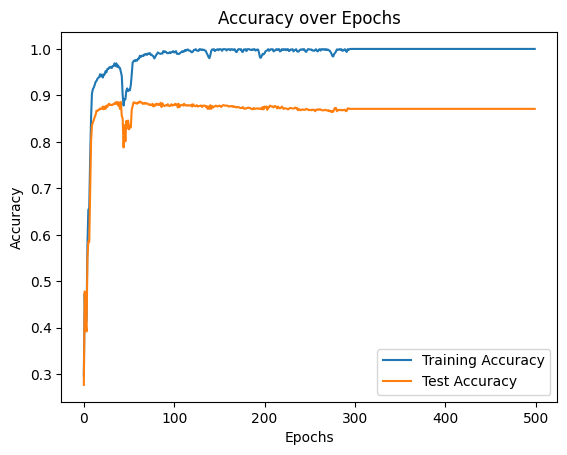

In [639]:
train_in = add_bias(train_in)
test_in = add_bias(test_in)

# Train perceptron and plot results
W, train_acc_history, test_acc_history = train_perceptron(train_in, train_out, test_in, test_out, epochs=500, learning_rate=0.29)

print(f"Best performance at epoch {best_epoch+1} with Train accuracy of {accuracy(train_out, predict(train_in, best_weight))} \
    and Test accuracy of {accuracy(test_out, predict(test_in, best_weight))}")

# Plot the accuracy over epochs
plt.plot(train_acc_history, label="Training Accuracy")
plt.plot(test_acc_history, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()
